# Semi Supervised Learning - Label Spreading Model

This notebook is to perform semi-supervised learning by using the Label Spreading algorithm from the baseline model. The baseline model is developed in `CSI5155 Project - baseline.ipynb`.

## Import Necessary Packages

In [1]:
import numpy as np;
import os;
import sys;
import joblib;
import random;
from sklearn.model_selection import train_test_split;
import joblib;
import pandas as pd;
import matplotlib.pyplot as plt;
# importing custom modules
sys.path.append("../Assignment 1 - Model Comparison/");
from fileOrganizer import unpack;
from performance import evalAccuracy, evalPrecision, evalRecall, evalF1Score, printConfMtx, plotROC;
import constants;
from model.LabelSpreading import build_label_spreading_model, train, predict;

## Load the Data

Original Dataset (without labelling/unlabelling, but normalized)

In [2]:
mush_X_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.X_TRAIN_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Training Set: ", len(mush_X_train_norm));
print("Number of Features in the Normalized Training Set: ", len(mush_X_train_norm[random.randint(0, len(mush_X_train_norm)-1)]));
print("Value range of the original Training Set: ", np.min(mush_X_train_norm), np.max(mush_X_train_norm));

Number of Normalized Samples in Training Set:  1256
Number of Features in the Normalized Training Set:  12
Value range of the original Training Set:  -4.827248760778992 13.457018899436779


In [3]:
mush_y_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.Y_TRAIN_NORMALIZED_FILENAME
));
print("Number of Samples in Training Set: ", len(mush_y_train_norm));
print("Unique Labels in Training Set: ", np.unique(mush_y_train_norm));

Number of Samples in Training Set:  1256
Unique Labels in Training Set:  [0 1]


In [4]:
mush_X_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Testing Set: ", len(mush_X_test_norm));
print("Number of Features in the Normalized Testing Set: ", len(mush_X_test_norm[random.randint(0, len(mush_X_test_norm)-1)]));
print("Value range of the Normalized Testing Set: ", np.min(mush_X_test_norm), np.max(mush_X_test_norm));

Number of Normalized Samples in Testing Set:  629
Number of Features in the Normalized Testing Set:  12
Value range of the Normalized Testing Set:  -4.827248760778992 13.457018899436779


In [5]:
mush_y_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test_norm));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test_norm));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  [0 1]


Labelled Data

In [6]:
X_train_labelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_LABELLED_FILENAME
));
print("Number of Labelled Samples: ", len(X_train_labelled));
print("Number of Features in the Labelled Training Set: ", len(X_train_labelled[random.randint(0, len(X_train_labelled)-1)]));
print("Value range of the Labelled Training Set: ", np.min(X_train_labelled), np.max(X_train_labelled));

Number of Labelled Samples:  251
Number of Features in the Labelled Training Set:  12
Value range of the Labelled Training Set:  -4.827248760778992 3.262658784576777


In [7]:
y_train_labelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_LABELLED_FILENAME
));
print("Number of Labelled Labels: ", len(y_train_labelled));
print("Unique Labels: ", np.unique(y_train_labelled));

Number of Labelled Labels:  251
Unique Labels:  [0 1]


Unlabelled Data

In [8]:
X_train_unlabelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_UNLABELLED_FILENAME
));
print("Number of Unlabelled Samples: ", len(X_train_unlabelled));
print("Number of Features in the Unlabelled Training Set: ", len(X_train_unlabelled[random.randint(0, len(X_train_unlabelled)-1)]));
print("Value range of the Unlabelled Training Set: ", np.min(X_train_unlabelled), np.max(X_train_unlabelled));

Number of Unlabelled Samples:  1005
Number of Features in the Unlabelled Training Set:  12
Value range of the Unlabelled Training Set:  -4.827248760778992 13.457018899436779


In [9]:
# This is the true labels for the supposedly unlabelled data
# for debugging purpose!!!
y_train_unlabelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_UNLABELLED_FILENAME
));
print("Number of Unlabelled Labels: ", len(y_train_unlabelled));
print("Unique Labels: ", np.unique(y_train_unlabelled));

Number of Unlabelled Labels:  1005
Unique Labels:  [0 1]


Test Data

In [10]:
mush_X_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Testing Set: ", len(mush_X_test_norm));
print("Number of Features in the Normalized Testing Set: ", len(mush_X_test_norm[random.randint(0, len(mush_X_test_norm)-1)]));
print("Value range of the Normalized Testing Set: ", np.min(mush_X_test_norm), np.max(mush_X_test_norm));

Number of Normalized Samples in Testing Set:  629
Number of Features in the Normalized Testing Set:  12
Value range of the Normalized Testing Set:  -4.827248760778992 13.457018899436779


In [11]:
mush_y_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test_norm));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test_norm));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  [0 1]


## Load the Column Names

In [12]:
columns = joblib.load(os.path.join(
    constants.COLUMNS_DIR,
    constants.COLUMNS_FILENAME
));
print("Columns in a sample: ", columns);

Columns in a sample:  ['age' 'gender' 'education' 'country' 'ethnicity' 'nscore' 'escore'
 'oscore' 'ascore' 'cscore' 'impuslive' 'ss']


## Load the Model

In [13]:
gradientBoost = unpack(os.path.join(
    constants.MODEL_DIR,
    constants.MODEL_FILENAME
));
gradientBoost

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': array([ 6,  8,  4, 14, 12,  9,  9,  3,  7, 17, 19,  1, 19, 17, 15, 12, 16,
       18,  2,  8, 15,  9, 12,  2,  8, 17, 11,  1, 14, 15, 13,  4,  1, 19,
       12, 15,  6, 19,  9, 17, 10, 12, 16,  3,  5, 13, 10, 19,  5,  5,  4,
       10,  6,  4,  5,  2, 17,  1,  1,  5, 10,  1, 10, 11,  8, 14, 13, 12,
        8, 17, 14,  1,  3,  4, 19, 10,  6, 19, 14,  2, 19, 15, 13,  7,  5,
        3,  4,  3, 14, 10,  5, 16, 10,  5, 16, 15,  4,  8, 17,  8],
      dtype=int64),
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029131497AC0>},
                   random_state=42)

## Label Spreading Algorithm

### Initialize the Label Spreading Model

We initialize the model as a pipeline with the gradient boosting model as the original model.

In [14]:
labelSpread = build_label_spreading_model(
    origModel=gradientBoost,
);
labelSpread

Model saved to 'model\mushrooms_model_LabelSpreading.pkl'


Pipeline(steps=[('original model',
                 ProbabilitiesTransformer(model=GradientBoostingClassifier(max_depth=8,
                                                                           min_samples_split=0.2285801361297467))),
                ('label_spread',
                 RandomizedSearchCV(estimator=LabelSpreading(), n_iter=100,
                                    param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029130C3A860>,
                                                         'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029130C3BAF0>},
                                    random_state=42))])

### Train the Model

In [15]:
labelSpread = train(
    model=labelSpread,
    X_train=X_train_labelled,
    y_train=y_train_labelled
)

Model saved to 'model\mushrooms_model_LabelSpreading.pkl'


### Generate the Pseudo-Labels for Unlabelled Data from Predictions

In [16]:
y_pred_unlabelled = predict(
    model=labelSpread,
    X_test=X_train_unlabelled
);
print("Number of Predictions: ", len(y_pred_unlabelled));
print("Unique Predictions: ", np.unique(y_pred_unlabelled));

Number of Predictions:  1005
Unique Predictions:  [0 1]


### Train the Model again with pseudo-labels

#### Concatenate Labelled and Unlabelled Data

In [17]:
X_combined = np.concatenate((X_train_labelled, X_train_unlabelled));
print(f"Number of samples in total: {len(X_combined)}");
print(f"Number of Features in a sample: {len(X_combined[random.randint(0, len(X_combined)-1)])}");

Number of samples in total: 1256
Number of Features in a sample: 12


In [18]:
y_combined = np.concatenate((y_train_labelled, y_pred_unlabelled));
print(f"Number of labels in total: {len(y_combined)}");
print(f"Unique Labels: {np.unique(y_combined)}");

Number of labels in total: 1256
Unique Labels: [0 1]


#### Re-train the Model

In [19]:
labelSpread = train(
    model=labelSpread,
    X_train=X_combined, 
    y_train=y_combined
);

Model saved to 'model\mushrooms_model_LabelSpreading.pkl'


## Evaluation

### Make Predictions on the Test Set

In [20]:
y_pred = predict(
    model=labelSpread,
    X_test=mush_X_test_norm
);
print("Number of Predictions made: ", len(y_pred));
print("Unique Predictions: ", np.unique(y_pred));

Number of Predictions made:  629
Unique Predictions:  [0 1]


In [21]:
y_pred_proba = labelSpread.predict_proba(mush_X_test_norm)[:, 1];
print("Number of Predictions made: ", len(y_pred_proba));
print("Value range of the Predictions: ", np.min(y_pred_proba), ' to ', np.max(y_pred_proba));

Number of Predictions made:  629
Value range of the Predictions:  0.0005451679193073438  to  0.9982954279302778


### Save Pred Proba Value

In [22]:
joblib.dump(y_pred_proba, os.path.join(
    constants.PRED_DIR,
    constants.Y_PRED_TEST_LABELSPREAD_FILENAME
));

### Evaluate the Metrics

In [23]:
evalArr = y_pred == mush_y_test_norm;
print("Number of correct predictions: ", len(evalArr[evalArr == True]));
print("Number of incorrect predictions: ", len(evalArr[evalArr == False]));

Number of correct predictions:  456
Number of incorrect predictions:  173


In [24]:
accuracy = evalAccuracy(y_pred, mush_y_test_norm);
precision = evalPrecision(y_pred, mush_y_test_norm);
recall = evalRecall(y_pred, mush_y_test_norm);
f1 = evalF1Score(y_pred, mush_y_test_norm);
print("Accuracy: ", accuracy);
print("Precision: ", precision);
print("Recall: ", recall);
print("F1 Score: ", f1);

Accuracy:  0.724960254372019
Precision:  0.6113207547169811
Recall:  0.6982758620689655
F1 Score:  0.6519114688128772


### Print the Confusion Matrix from the Test Set

In [25]:
printConfMtx(y_pred, mush_y_test_norm)

Predicted,user,non-user,All
Actual,,,
user,162,70,232
non-user,103,294,397
All,265,364,629


### Display the ROC Curve and its Area Under the Curve (AUC)

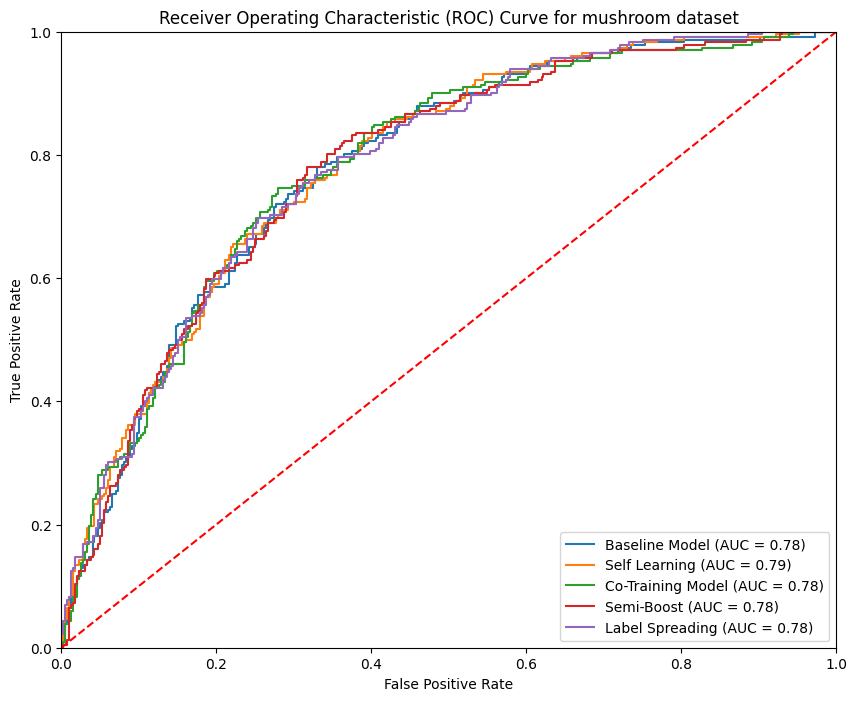

AUC of the baseline model:  0.7812581429688179
AUC of the Self Learning model:  0.7852970555024754
AUC of the combined Co-Training Model: 0.7837010336141753
AUC of the Semi Boost Model: 0.780432988795275
AUC of the Label Spreading Model: 0.783386172153218


In [ ]:
features_subsets = joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.CO_TRAINING_BEST_FEATURE_SPLIT_RESULTS_FILENAME
        ));
AUC_baseline, AUC_selftraining, AUC_cotraining, AUC_semiboost, AUC_labelspread = plotROC(
    models={
        "Baseline Model": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_FILENAME
        )),
        "Self Learning": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_SELFTRAIN_FILENAME
        )),
        "Co-Training Model": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_COTRAIN_1_FILENAME
        )),
        "Semi-Boost": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_SEMIBOOST_FILENAME
        )),
        "Label Spreading": labelSpread
    },
    X_test=mush_X_test_norm,
    y_test=mush_y_test_norm,
    feature_subsets={
        "Co-Training Model 1": features_subsets["features_view1"],
        "Co-Training Model 2": features_subsets["features_view2"]
    },
    y_pred_proba = [
        joblib.load(os.path.join(
            constants.PRED_DIR,
            constants.Y_PRED_TEST_BASELINE_FILENAME
        )),
        joblib.load(os.path.join(
            constants.PRED_DIR,
            constants.Y_PRED_TEST_SELFTRAIN_FILENAME
        )),
        joblib.load(os.path.join(
            constants.PRED_DIR,
            constants.Y_PRED_TEST_COTRAIN_FILENAME
        )),
        joblib.load(os.path.join(
            constants.PRED_DIR,
            constants.Y_PRED_TEST_SEMIBOOST_FILENAME
        )),
        joblib.load(os.path.join(
            constants.PRED_DIR,
            constants.Y_PRED_TEST_LABELSPREAD_FILENAME
        ))
    ],
    dataset="mushroom"
);
print("AUC of the baseline model: ", AUC_baseline);
print("AUC of the Self Learning model: ", AUC_selftraining);
print(f"AUC of the combined Co-Training Model: {AUC_cotraining}");
print(f"AUC of the Semi Boost Model: {AUC_semiboost}");
print(f"AUC of the Label Spreading Model: {AUC_labelspread}");